<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Data Description

Medical costs of people  characterized by certain attributes

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Attributes

**Age:** age of primary beneficiary  

**Sex:** insurance contractor gender, female, male  

**BMI:** Body mass index, providing an understanding of body,  weights that are relatively high or low relative to height,  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally **18.5 to 24.9**

**Children:** Number of children covered by health insurance /  Number of dependents  

**Smoker:** Smoking  

**Region:** The beneficiary's residential area in the US, northeast,  southeast, southwest, northwest.  

**Charges:** Individual medical costs billed by health insurance

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Read the Data

In [2]:
Ins_df = pd.read_csv('Insurance.csv')
Ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Exploratory Data Analysis

In [3]:
Ins_df.shape # Returns the no of attributes and rows

(1338, 7)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Check the Information about the data and the datatypes of each respective attributes.

In [4]:
Ins_df.info() # returns the data types of each of the attribute along with the count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Checking the presence of missing values

In [5]:
Ins_df.isna().sum() # lists the null values for each of the data attribute

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5 Point summary of all the numerical variables

In [25]:
Ins_df.describe().loc[['min','25%','50%','75%','max']] # the output results provide the five point summary of the data.
# 5 -point Summary Min, Quartile 25%, Median, Quartile 75% and Max

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

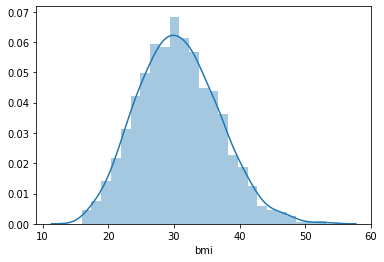

In [26]:
sns.distplot(Ins_df['bmi']) # almost symmetric

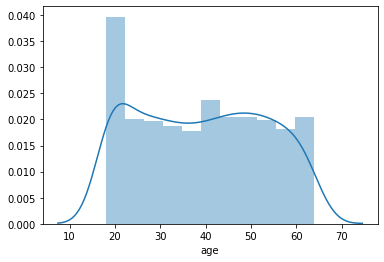

In [27]:
sns.distplot(Ins_df['age']) # multi-modal distribution

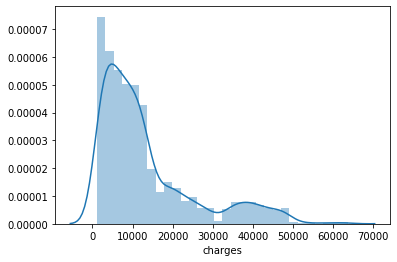

In [28]:
sns.distplot(Ins_df['charges']) # right-skewed

In [30]:
# Encoding the Numeric variable to find out the distribution of the categorical columns
from sklearn.preprocessing import LabelEncoder
sns.set(style="ticks", color_codes=True)
lb_catencoder = LabelEncoder()
Ins_df["region"] = lb_catencoder.fit_transform(Ins_df["region"])
Ins_df["sex"] = lb_catencoder.fit_transform(Ins_df["sex"])
Ins_df["smoker"] = lb_catencoder.fit_transform(Ins_df["smoker"])

Ins_df.skew()    # to measure the skeweness of every attribute
# Age, bmi, Children, smoker and Charges are positively skewed while sex and region are negatively skewed

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns 

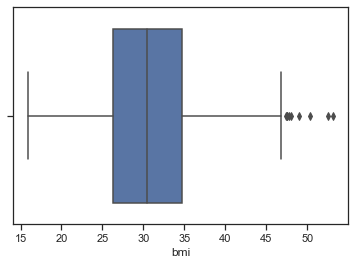

In [31]:
sns.boxplot(x = Ins_df['bmi']) # 6 outliers beyond 45 even exceeds 50 bmi range which shows the data has super obese people

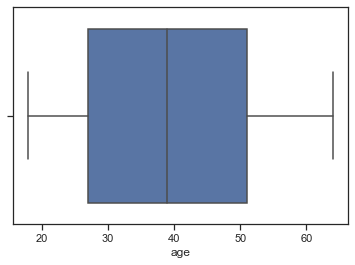

In [32]:
sns.boxplot(x = Ins_df['age']) # No outliers

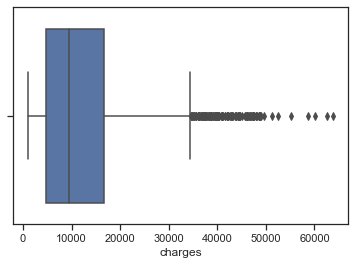

In [33]:
sns.boxplot(x = Ins_df['charges']) # lot of outliers beyond 30K charges

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Distribution of categorical columns (include  children)  

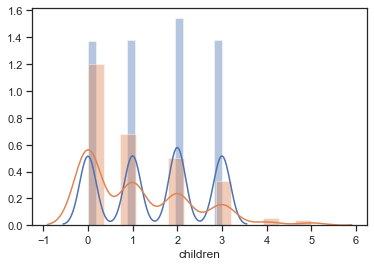

In [35]:
sns.distplot(Ins_df['region'], kde = True)
sns.distplot(Ins_df['children'], kde = True)

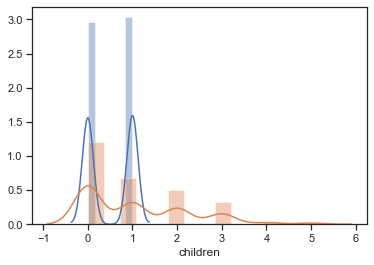

In [36]:
sns.distplot(Ins_df['sex'], kde = True)
sns.distplot(Ins_df['children'], kde = True)

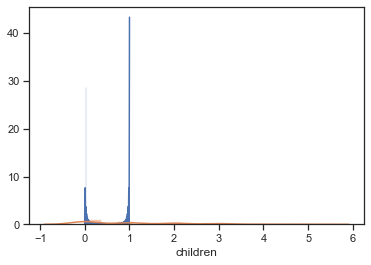

In [37]:
sns.distplot(Ins_df['smoker'], kde = True)
sns.distplot(Ins_df['children'], kde = True)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Pair plot that includes all the columns of the data  frame

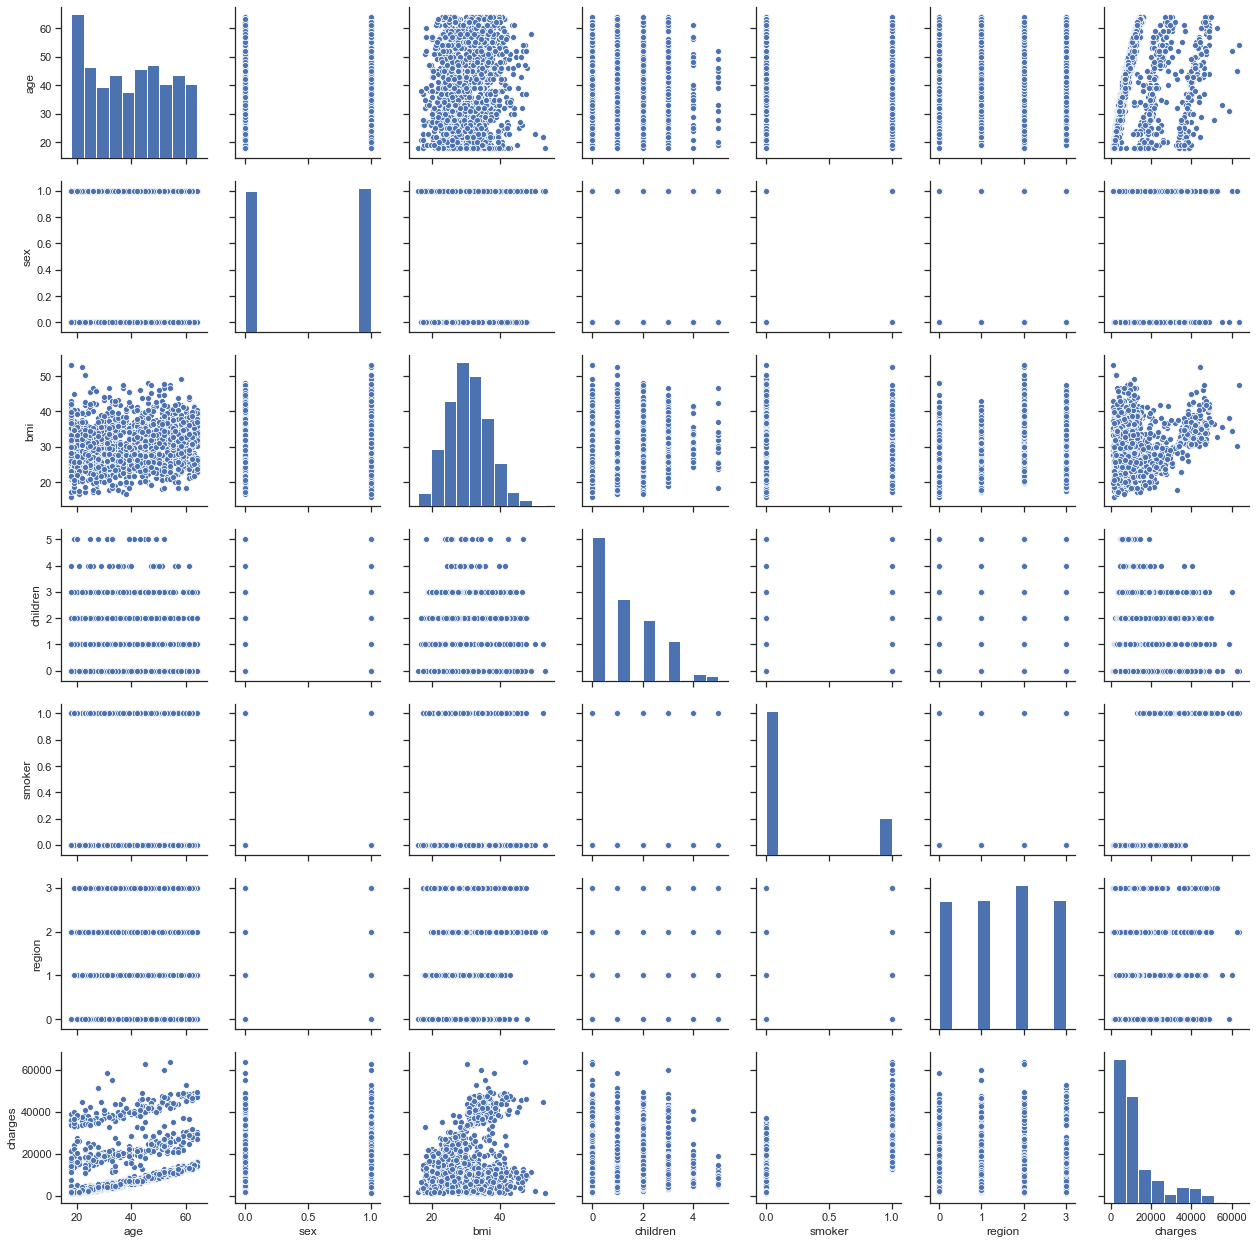

In [39]:
sns.pairplot(Ins_df,palette='husl')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Do charges of people who smoke differ significantly  from the people who don't?

In testing whether the Insurance charges of the smokers is significantly different from that of the non-smokers, the null hypothesis states that Insurance of Smokers and Non-smokers are same. The alternative hypothesis states that the Insurance charges for smokers vs smokers are significantly different
* $H_0$: Insurance charges of Smokers and Non-smokers are same
* $H_A$: Insurance charges of Smokers and non-Smokers differ significantly

p-value:  8.271435842177219e-283 is less than significance level of 0.05, hence the Insurance charges of people who smoke differ significantly from the people who dont smoke


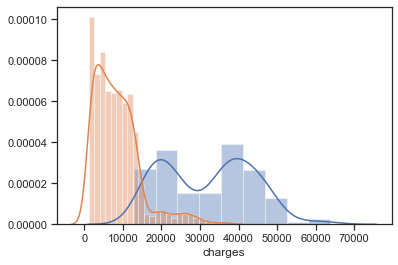

In [41]:
import scipy.stats as stats
Ins_charges_smoker = Ins_df[Ins_df['smoker']==1]['charges']
Ins_charges_nonsmoker = Ins_df[Ins_df['smoker']==0]['charges']
sns.distplot(Ins_charges_smoker)
sns.distplot(Ins_charges_nonsmoker)
t_statistic, p_value  =  stats.ttest_ind(Ins_charges_smoker,Ins_charges_nonsmoker)
print("p-value: ",p_value,"is less than significance level of 0.05, hence the Insurance charges of people who smoke differ significantly from the people who dont smoke")
# The p-value is less than the significance level of 0.05, hence we have evidence to reject null hyothesis
# Yes, Insurance charges of People who smoke differ significantly from the people who dont smoke

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Does bmi of males differ significantly from that of females?

In testing whether the bmi of males is significantly different from that of the females, the null hypothesis states that bmi of males and females are the same. The alternative hypothesis states that the bmi of males differ significantly from females
* $H_0$: bmi of males and females are same
* $H_A$: bmi of males and females differ significantly

p-value:  0.08997637178984934 is greater than significance level of 0.05, hence the bmi of males and females does not differ significantly


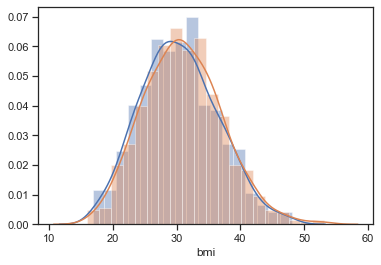

In [42]:
bmi_males = Ins_df[Ins_df['sex']==0]['bmi']
bmi_females = Ins_df[Ins_df['sex']==1]['bmi']
sns.distplot(bmi_males)
sns.distplot(bmi_females)
t_statistic, p_value  =  stats.ttest_ind(bmi_males,bmi_females)
print("p-value: ",p_value,"is greater than significance level of 0.05, hence the bmi of males and females does not differ significantly")
# p-value(0.08)is greater than the significance level of 0.05, hence there is not enough evidence to reject null hyothesis
# No, bmi of males and females does not differ significantly

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Is the proportion of smokers significantly different in different genders?

* $H_0$: Proportion of smokers in male and female population are equal
* $H_A$: Proportion of smokers in male and female population are not equal

In [43]:
pd.crosstab(Ins_df['sex'], Ins_df['smoker'], margins = True)

smoker,0,1,All
sex,,,
0,547,115,662
1,517,159,676
All,1064,274,1338


In [44]:
female_smokers = Ins_df[Ins_df['sex'] == 1].smoker.value_counts()[1]  # number of female smokers
male_smokers = Ins_df[Ins_df['sex'] == 0].smoker.value_counts()[1] # number of male smokers

n_females = Ins_df.sex.value_counts()[1] # number of females in the data
n_males = Ins_df.sex.value_counts()[0] #number of males in the data

print([female_smokers, male_smokers] , [n_females, n_males]) # print the counts and totals

print('proportion of smokers in females', round(female_smokers/n_females,2)) # proportion of females

print('proportion of smokers in males', round(male_smokers/n_males,2)) # proportion of males

[159, 115] [676, 662]
proportion of smokers in females 0.24
proportion of smokers in males 0.17


The proportions are different but are they statistically significant?

In [47]:
# proportion chisquare to test if the proportion of male and females smokers are equal

from statsmodels.stats.proportion import proportions_chisquare

pval = proportions_chisquare(np.array([female_smokers, male_smokers]), np.array([n_females, n_males]))

print(pval)

if pval[1] < 0.05:
    print(f'With a p-value of {round(pval[1],4)} the proportion of smokers in different genders are not equal. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval[1],4)} the proportion of smokers in different genders are equal. aka |We fail to reject the null|')

(7.765921028604452, 0.005324114164320537, (array([[159, 517],
       [115, 547]], dtype=int64), array([[138.43348281, 537.56651719],
       [135.56651719, 526.43348281]])))
With a p-value of 0.0053 the proportion of smokers in different genders are not equal. aka |We reject the null|


 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Is the distribution of bmi across women with no children, one child and two children, the same ?

* $H_0$: Bmi of women with no,one or two child are same
* $H_A$: Bmi of women with no,one or two child differ significantly

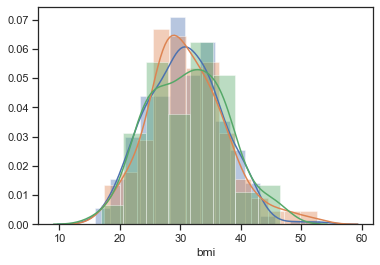

In [48]:
import scipy.stats as stats
bmi_w_0 = Ins_df.loc[(Ins_df['sex'] ==1) & (Ins_df['children'] == 0)]['bmi']
bmi_w_1 = Ins_df.loc[(Ins_df['sex'] ==1) & (Ins_df['children'] == 1)]['bmi']
bmi_w_2 = Ins_df.loc[(Ins_df['sex'] ==1) & (Ins_df['children'] == 2)]['bmi']
sns.distplot(bmi_w_0)
sns.distplot(bmi_w_1)
sns.distplot(bmi_w_2)

In [49]:
# One-way Anova test
bmi_women_df = pd.DataFrame()

bmi_df1 = pd.DataFrame({'Women_Type': 'W0', 'BMI':bmi_w_0})
bmi_df2 = pd.DataFrame({'Women_Type': 'W1', 'BMI':bmi_w_1})
bmi_df3= pd.DataFrame({'Women_Type': 'W2', 'BMI':bmi_w_2})

bmi_women_df = bmi_women_df.append(bmi_df1) 
bmi_women_df = bmi_women_df.append(bmi_df2) 
bmi_women_df = bmi_women_df.append(bmi_df3) 

import statsmodels.api  as  sm
from   statsmodels.formula.api import ols
 
mod = ols('BMI ~ Women_Type', data = bmi_women_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
print('p-value is great than the significance level of 0.05 and hence we fail to reject null')
print('The distribution of bmi across women with 0,1 and 2 child are the same')

                  sum_sq     df         F    PR(>F)
Women_Type     34.394974    2.0  0.440628  0.643851
Residual    22207.779221  569.0       NaN       NaN
p-value is great than the significance level of 0.05 and hence we fail to reject null
The distribution of bmi across women with 0,1 and 2 child are the same
